In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

# 1. Naive Bayes

## 1.1 Weather(이진분류)

In [1]:
weather=['Rainy','Rainy','Sunny','Sunny','Sunny','Overcast','Overcast','Overcast','Overcast','Rainy',\
         'Rainy','Rainy','Sunny','Sunny']
temp=['Cool','Mild','Hot','Hot','Mild','Cool','Hot','Hot','Mild','Cool','Mild','Mild','Cool','Mild']
play=['No','No','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']


In [18]:
# data preprocessing

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
weather_encoded = LE.fit_transform(weather)
temp_encoded = LE.fit_transform(temp)
data = np.c_[weather_encoded, temp_encoded] # (i,) array j개 ->  (j,i) shape로 concat

target = LE.fit_transform(play)
print('data\n', data)
print('target\n', target)

data
 [[1 0]
 [1 2]
 [2 1]
 [2 1]
 [2 2]
 [0 0]
 [0 1]
 [0 1]
 [0 2]
 [1 0]
 [1 2]
 [1 2]
 [2 0]
 [2 2]]
target
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1]


In [11]:
# train model

from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB(alpha=0) # alpha : smoothing 설정.
CNB.fit(data, target)

C:\Users\GW\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

In [17]:
# estimate train data set
prob = np.round(CNB.predict_proba(data),2) # row마다의 class별 prob 출력
pred = CNB.predict(data)

print(np.hstack([prob, pred.reshape(-1,1)]))

[[0.29 0.71 1.  ]
 [0.37 0.63 1.  ]
 [0.73 0.27 0.  ]
 [0.73 0.27 0.  ]
 [0.57 0.43 0.  ]
 [0.   1.   1.  ]
 [0.   1.   1.  ]
 [0.   1.   1.  ]
 [0.   1.   1.  ]
 [0.29 0.71 1.  ]
 [0.37 0.63 1.  ]
 [0.37 0.63 1.  ]
 [0.47 0.53 1.  ]
 [0.57 0.43 0.  ]]


In [21]:
score=CNB.score(data, target) # 분류정확도 score

print(round(score,2))
print(target)
print(pred)

0.79
[0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[1 1 0 0 0 1 1 1 1 1 1 1 1 0]


In [26]:
# 기타
print(CNB.classes_) # 클래스 종류
print(CNB.class_count_) # 클래스 별 원소 개수
print(np.round(np.exp(CNB.class_log_prior_),2)) # 클래스 사전확률 (log) >> 원래 확률로 전환
print(np.round(np.exp(CNB.feature_log_prob_),2)) # 가능도(likelihood) 

[0 1]
[5. 9.]
[0.36 0.64]
[[[0.   0.4  0.6 ]
  [0.44 0.33 0.22]]

 [[0.2  0.4  0.4 ]
  [0.33 0.22 0.44]]]


## 1.2 Mushroom(이진분류)

### 1.2.1 Data preprocessing

In [27]:
import pandas as pd
import numpy as np

df= pd.read_csv('./data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
# check null data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [29]:
# describe
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

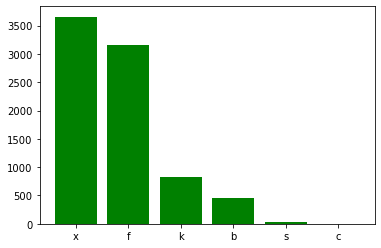

In [35]:
x = df['cap-shape'].value_counts().index
y = df['cap-shape'].value_counts()
plt.bar(x,y,color='green')
plt.show()

In [47]:
data = df.loc[:,'cap-shape':'habitat'].values
target = df['class'].values

print('shape')
print('data :', data.shape)
print('tareget :', target.shape)
# print('unique')
# print(np.unique(data[:,0], return_counts=True))

shape
data : (8124, 22)
tareget : (8124,)


### 1.2.2 Modeling - Use all data for training

In [49]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in range(len(data[0])):
    data[:,i] = LE.fit_transform(data[:,i])

target = LE.fit_transform(target)

print('data:\n', data)
print('target:\n', target)

data:
 [[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]
target:
 [1 0 0 ... 0 1 0]


In [50]:
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()
CNB.fit(data, target)

print(round(CNB.score(data, target),2))

0.96


### 1.2.3 Modeling - Split data set : train, test
- train_test_split(stratify=target) :  train과 test 데이터 양측의 target 클래스 비율을 동일하게 맞추는 설정. 이 옵션이 누락되면 타겟 클레스가 불균등하게 나뉠 수 있다.

In [65]:
from sklearn.model_selection import train_test_split

# stratify : target
train_x, test_x, train_y, test_y = train_test_split(data, target, stratify=target, test_size=0.2, random_state=42)
print('data shape')
print('train x,y :', train_x.shape, train_y.shape)
print('test x,y :', test_x.shape, test_y.shape)

data shape
train x,y : (6499, 22) (6499,)
test x,y : (1625, 22) (1625,)


In [66]:
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()
CNB.fit(train_x, train_y)

sc_train = CNB.score(train_x, train_y)
sc_test = CNB.score(test_x, test_y)
print('score')
print('train :', round(sc_train,4))
print('test :', round(sc_test,4))

score
train : 0.9545
test : 0.9458
